In [1]:
#!apt update

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://security.debian.org/debian-security buster/updates InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
85 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [2]:
#!apt install libgl1-mesa-glx -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-glx is already the newest version (18.3.6-2+deb10u1).
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.


In [3]:
#!pip install opencv-python

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [4]:
from dataclasses import dataclass
from typing import List
import numpy
import matplotlib.pyplot as plt
import matplotlib.image
import cv2

In [5]:
@dataclass
class Point:
    x: int
    y: int
    tag: str = None

In [6]:
@dataclass
class Mapping:
    source_points: List[Point]
    target_points: List[Point]
    street_view_file: str = None
    satellite_view_file: str = None
    map_view_file: str = None
        
    def get_array(self):
        source_array = numpy.array([[p.x, p.y] for p in self.source_points])
        target_array = numpy.array([[p.x, p.y] for p in self.target_points])
        return source_array, target_array
        
    def display(self):
        try:
            for image_file in [self.street_view_file, self.satellite_view_file, self.map_view_file]:
                if not image_file:
                    continue
                img = matplotlib.image.imread(image_file)
                plt.imshow(img)
                plt.show()
        except:
            raise Exception(f"Image not find: {self.image_file}.")

In [7]:
class Homography:
    
    def __init__(self):
        self.matrix = None
        
    def fit(self, mapping):
        source_array, target_array = mapping.get_array()
        self.matrix, status = cv2.findHomography(source_array, target_array)
        
    def transform(self, point):
        source_point = numpy.array([[point.x, point.y]], dtype='float32')
        source_point = numpy.array([source_point])
        target_point = cv2.perspectiveTransform(source_point, self.matrix)
        return Point(target_point[0][0][0], target_point[0][0][1])

In [8]:
source_points = [
    Point(56, 766, "pink"),
    Point(591, 790, "yellow"),
    Point(1251, 712, "red"),
    Point(1303, 1055, "blue"),
    Point(1695, 842, "teal"),
    Point(2104, 817, "green"),
    Point(2738, 1051, "orange")
]

In [9]:
target_points = [
    Point(540, 151, "pink"),
    Point(458, 231, "yellow"),
    Point(650, 553, "red"),
    Point(262, 246, "blue"),
    Point(301, 425, "teal"),
    Point(224, 574, "green"),
    Point(157, 319, "orange")
]

In [10]:
mapping = Mapping(source_points, 
                  target_points, 
                  "./sample/street_view_tagged.png", 
                  "./sample/satellite_tagged.png", 
                  "./sample/map_tagged.png")

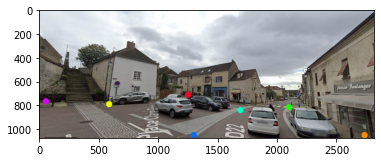

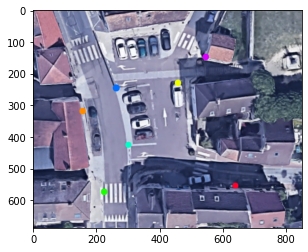

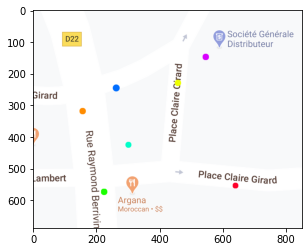

In [11]:
mapping.display()

In [12]:
h = Homography()

In [13]:
h.fit(mapping)

Looking at white car bottom on first picture (1800, 900), it translate to (258, 345) on the map. Works pretty well !

In [14]:
h.transform(Point(1800, 900))

Point(x=258.5717, y=345.16177, tag=None)